In [1]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
raw = pd.read_csv("botswana.tsv", sep="\t", index_col=False) 
raw.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [3]:
raw['religion'].nunique()

4

In [4]:
raw.tail()


,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
4356,0,16,7,protestant,2.0,1.0,0.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4357,2,28,7,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4358,4,24,5,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4359,1,26,0,spirit,5.0,1.0,0.0,1,22.0,7.0,0,0.0,1.0,0.0,0.0
4360,6,36,3,protestant,8.0,1.0,1.0,1,21.0,0.0,0,0.0,1.0,0.0,0.0


In [5]:
raw.loc[:,'nevermarr'] = 0
raw.loc[raw.agefm.isna(), 'nevermarr'] = 1
raw.loc[raw.agefm.isna(), 'agefm'] = 0
raw.loc[raw.nevermarr ==1, 'heduc'] = -1

In [6]:
raw.drop('evermarr', inplace=True, axis=1)

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 15 columns):
ceb          4361 non-null int64
age          4361 non-null int64
educ         4361 non-null int64
religion     4361 non-null object
idlnchld     4241 non-null float64
knowmeth     4354 non-null float64
usemeth      4290 non-null float64
agefm        4361 non-null float64
heduc        4238 non-null float64
urban        4361 non-null int64
electric     4358 non-null float64
radio        4359 non-null float64
tv           4359 non-null float64
bicycle      4358 non-null float64
nevermarr    4361 non-null int64
dtypes: float64(9), int64(5), object(1)
memory usage: 511.1+ KB


In [8]:
raw.loc[:,'idlnchld_noans'] = 0
raw.loc[:,'heduc_noans'] = 0
raw.loc[:,'usemeth_noans'] = 0

raw.loc[raw.idlnchld.isna(),'idlnchld_noans'] = 1
raw.loc[raw.heduc.isna(),'heduc_noans'] = 1
raw.loc[raw.usemeth.isna(),'usemeth_noans'] = 1

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 18 columns):
ceb               4361 non-null int64
age               4361 non-null int64
educ              4361 non-null int64
religion          4361 non-null object
idlnchld          4241 non-null float64
knowmeth          4354 non-null float64
usemeth           4290 non-null float64
agefm             4361 non-null float64
heduc             4238 non-null float64
urban             4361 non-null int64
electric          4358 non-null float64
radio             4359 non-null float64
tv                4359 non-null float64
bicycle           4358 non-null float64
nevermarr         4361 non-null int64
idlnchld_noans    4361 non-null int64
heduc_noans       4361 non-null int64
usemeth_noans     4361 non-null int64
dtypes: float64(9), int64(8), object(1)
memory usage: 613.3+ KB


In [9]:
raw.loc[raw.idlnchld.isna(),'idlnchld'] = -1
raw.loc[raw.heduc.isna(),'heduc'] = -2
raw.loc[raw.usemeth.isna(),'usemeth'] = -1

In [10]:
raw.dropna(inplace=True)
print(raw.shape[0] * raw.shape[1])

78264


In [11]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +'\
             'agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr +'\
             ' idlnchld_noans + heduc_noans + usemeth_noans', data=raw)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:52:56   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [12]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:53:53   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

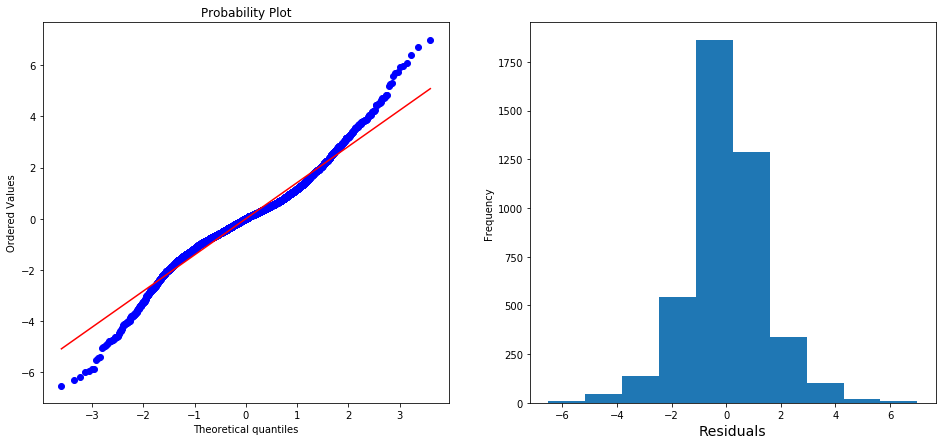

In [13]:
m4 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +'\
             'agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr +'\
             ' idlnchld_noans + heduc_noans + usemeth_noans', data=raw)

fitted = m4.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:55:09   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

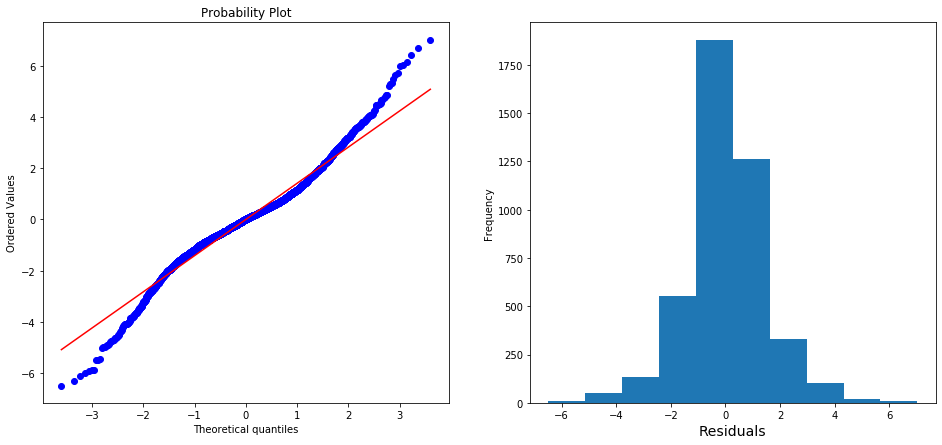

Breusch-Pagan test: p=1.11975e-228


In [16]:
m5 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth +'\
             'agefm + heduc + urban + electric + bicycle + nevermarr +'\
             ' idlnchld_noans + heduc_noans + usemeth_noans', data=raw)

fitted = m5.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

print('Breusch-Pagan test: p=%g' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

In [17]:
print("F=%f, p=%f, k1=%f" % m4.fit().compare_f_test(m5.fit()))

F=0.919236, p=0.467231, k1=5.000000


                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:57:09   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.

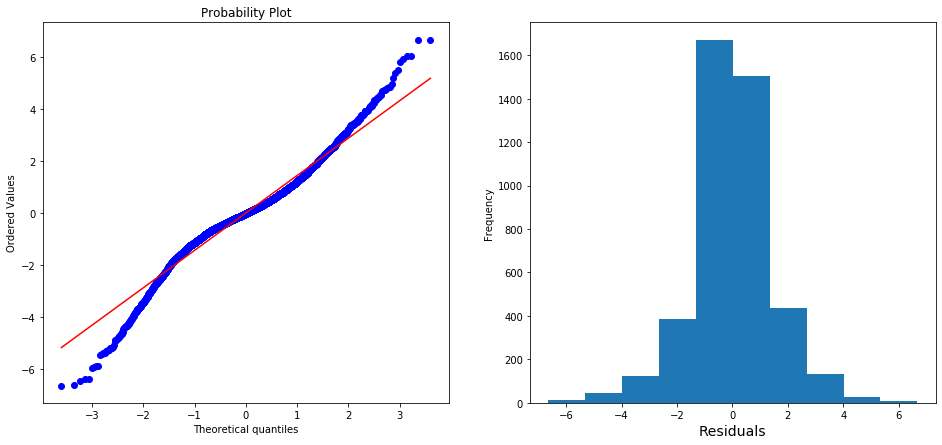

F=92.890582, p=3.1552e-40, k1=2.000000


In [21]:
m6 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + '\
             'agefm + heduc + urban + electric + bicycle + nevermarr + '\
             'idlnchld_noans + heduc_noans', data=raw)

fitted = m6.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

print("F=%f, p=%g, k1=%f" % m5.fit().compare_f_test(m6.fit()))